# Machine Learning and AI for Autonomous Systems
## A program by IISc and TalentSprint
### Mini Project: Image classification using MLP and CNN

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement CNN using keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [2]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

^C
replace FullIJCNN2013/00000.ppm? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Import Required packages

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

###**Excercise 1**

### Data Loading and Feature Extraction (1 points)

#### Get the features and labels of data

* Extract the features of the images
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [39]:
# YOUR CODE HERE

# Define the path to the directory containing the images
image_dir = "/content/FullIJCNN2013"

# Get a list of all image files (images are in PPM format)
image_files = glob.glob(os.path.join(image_dir, "*.ppm"))

# Initialize empty lists for features and labels
features = []
labels = []
features_gray = []
labels_gray = []
features_cnn = []
labels_cnn =[]

# Create an instance of ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    horizontal_flip=True,  # Enable random horizontal flip
    brightness_range=[0.8, 1.2]  # Adjust brightness (0.8 to 1.2)
)

# Load annotations from gt.txt (semicolon-separated fields)
with open("/content/FullIJCNN2013/gt.txt", "r") as file:
    lines = file.readlines()

# Process each line in the gt.txt file
for line in lines:
    fields = line.strip().split(";")
    filename = fields[0]
    leftmost, upmost, rightmost, downmost = map(int, fields[1:5])
    class_id = int(fields[5])

    # Find the corresponding image file
    image_path = os.path.join(image_dir, f"{filename}")

    # Load image using PIL
    image = Image.open(image_path)

    # Crop the region of interest (ROI)
    roi_image = image.crop((leftmost, upmost, rightmost, downmost))

    # Convert the ROI image to a 4D array (required by ImageDataGenerator)
    roi_image_array = np.expand_dims(np.array(roi_image), axis=0)

    # Generate augmented images
    augmented_images = datagen.flow(roi_image_array, batch_size=1)

    # Resize to 30x30
    augmented_image = augmented_images.next()[0]
    resized_image = np.array(Image.fromarray(augmented_image.astype(np.uint8)).resize((30, 30)))

    # Flatten the resized image
    flattened_image = resized_image.flatten()

    """# Resize ROI to (30, 30)
    resized_image = roi_image.resize((30, 30))

    # Convert to 1-D numpy array
    flattened_image = np.array(resized_image).flatten()"""

    grayscale_image = Image.fromarray(resized_image).convert("L")
    #grayscale_image = resized_image.convert("L")
    flattened_image_gray = np.array(grayscale_image).flatten()

    # Append features and labels
    features.append(flattened_image)
    labels.append(class_id)

    features_gray.append(flattened_image_gray)
    labels_gray.append(class_id)

    features_cnn.append(resized_image)
    labels_cnn.append(class_id)

# Convert lists to numpy arrays
features_array = np.array(features)
labels_array = np.array(labels)

features_array_gray = np.array(features_gray)
labels_array_gray = np.array(labels_gray)

features_array_cnn = np.array(features_cnn)
labels_array_cnn = np.array(labels_cnn)

# summarize image details
print(image.format)
print(image.mode)
print(image.size)

#summarize ROI image details
print(roi_image.format)
print(roi_image.mode)
print(roi_image.size)

# summarize resized image details
resized_pil_image = Image.fromarray(resized_image.astype(np.uint8))
print(resized_pil_image.format)
print(resized_pil_image.mode)
print(resized_pil_image.size)

"""print(resized_image.format)
print(resized_image.mode)
print(resized_image.size)"""

print(features_array.shape)
print(labels_array.shape)

print(features_array_gray.shape)
print(labels_array_gray.shape)

print(features_array_gray.shape)
print(labels_array_gray.shape)

print(features_array_cnn.shape)
print(labels_array_cnn.shape)

# Display the RGB image
#plt.imshow(image)
#plt.axis("off")
#plt.title("RGB Image")
#plt.show()

PPM
RGB
(1360, 800)
None
RGB
(57, 50)
None
RGB
(30, 30)
(1213, 2700)
(1213,)
(1213, 900)
(1213,)
(1213, 900)
(1213,)
(1213, 30, 30, 3)
(1213,)


###**Excercise 2**
### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

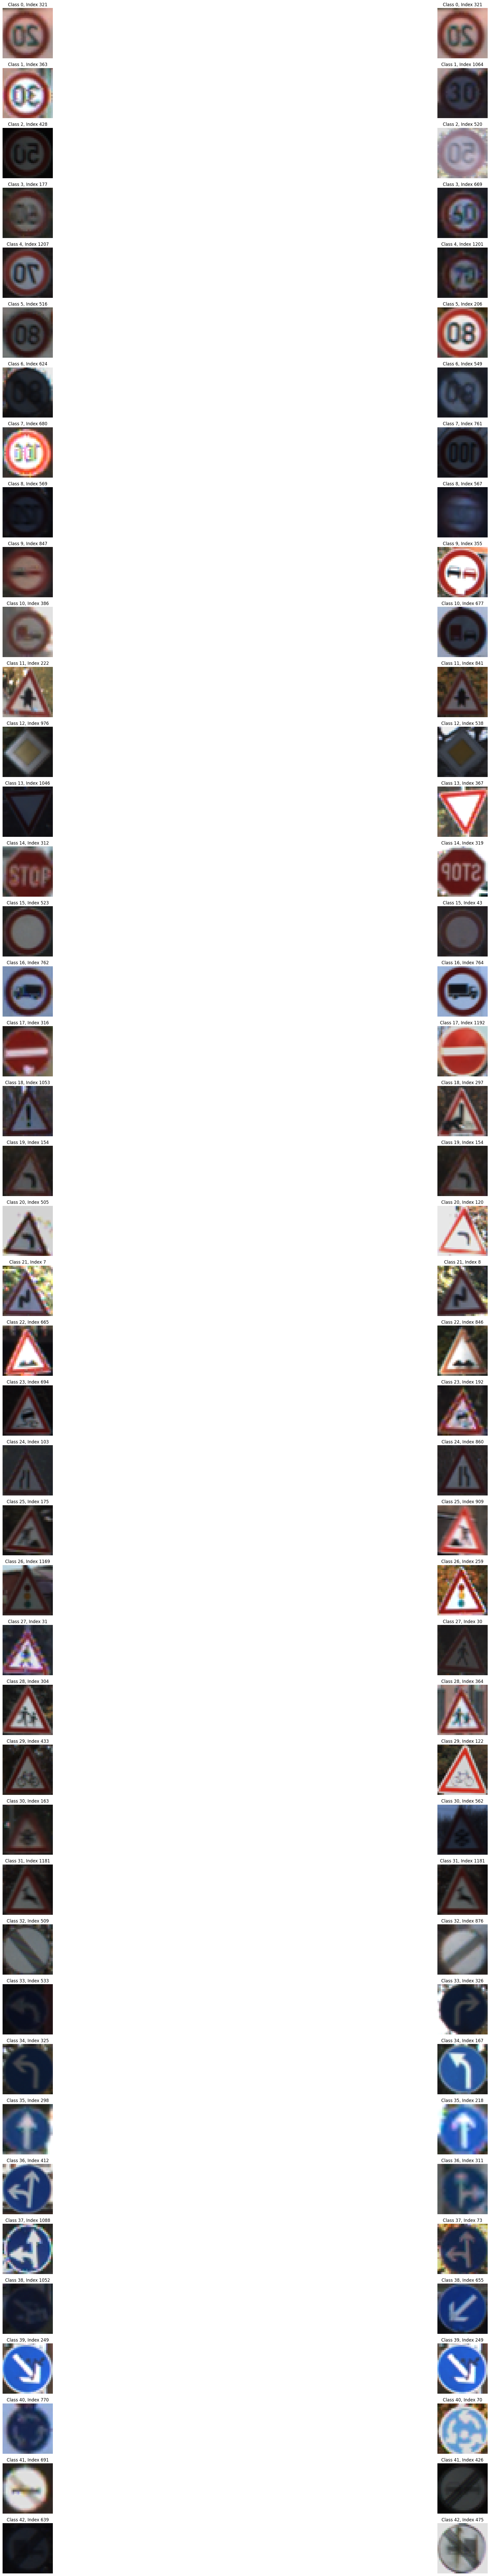

'# Define the number of sample images per class\nnum_samples_per_class = 2\n\n# Create subplots for each class\nfig, axs = plt.subplots(len(class_indices), num_samples_per_class, figsize=(50, 100))\n\nfor class_id, indices in class_indices.items():\n    for i in range(num_samples_per_class):\n        idx = indices[i]\n        image_rgb = features_array[idx].reshape(30, 30, 3)  # Reshape to original size\n        image_gray = features_array_gray[idx].reshape(30, 30)  # Reshape to original size\n        axs[class_id, i].imshow(image_rgb)\n        axs[class_id, i].axis("off")\n        #axs[class_id, i+1].imshow(image_gray)\n        #axs[class_id, i+1].axis("off")\n\n        # Add class label as title\n        axs[class_id, i].set_title(f"Class {class_id}")\n\nplt.tight_layout()\nplt.show()'

In [29]:
# YOUR CODE HERE
class_indices = {}
for idx, label in enumerate(labels_array):
    if label not in class_indices:
        class_indices[label] = []
    class_indices[label].append(idx)

# Define the number of sample images per class
num_samples_per_class = 2

# Create subplots for each class
fig, axs = plt.subplots(len(class_indices), num_samples_per_class, figsize=(50, 100))

for class_id, indices in class_indices.items():
    for i in range(num_samples_per_class):
        random_index = np.random.choice(indices)  # Choose a random index for this class
        image_rgb = features_array[random_index].reshape(30, 30, 3)  # Reshape to original size
        axs[class_id, i].imshow(image_rgb)
        axs[class_id, i].axis("off")
        axs[class_id, i].set_title(f"Class {class_id}, Index {random_index}")

plt.tight_layout()
plt.show()

"""# Define the number of sample images per class
num_samples_per_class = 2

# Create subplots for each class
fig, axs = plt.subplots(len(class_indices), num_samples_per_class, figsize=(50, 100))

for class_id, indices in class_indices.items():
    for i in range(num_samples_per_class):
        idx = indices[i]
        image_rgb = features_array[idx].reshape(30, 30, 3)  # Reshape to original size
        image_gray = features_array_gray[idx].reshape(30, 30)  # Reshape to original size
        axs[class_id, i].imshow(image_rgb)
        axs[class_id, i].axis("off")
        #axs[class_id, i+1].imshow(image_gray)
        #axs[class_id, i+1].axis("off")

        # Add class label as title
        axs[class_id, i].set_title(f"Class {class_id}")

plt.tight_layout()
plt.show()"""

#### Plot the distribution of Classes

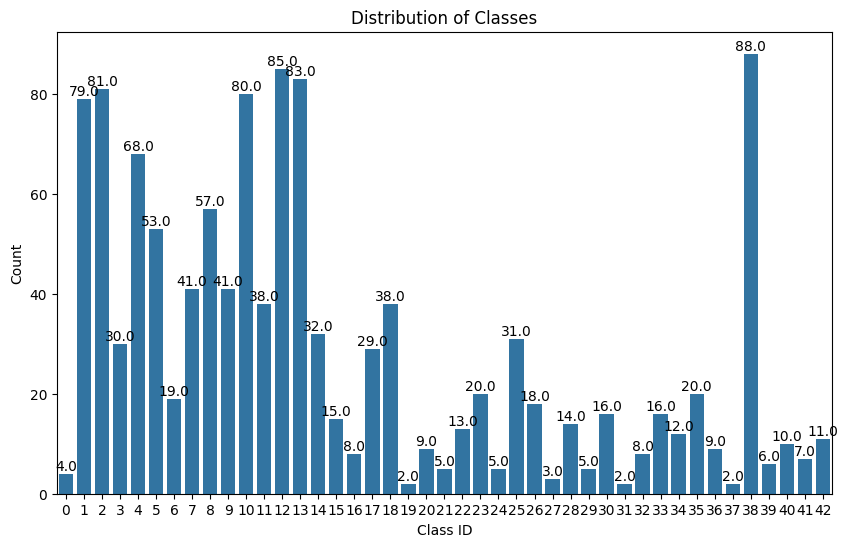

In [30]:
# YOUR CODE HERE
import seaborn as sns

# Create a countplot to show class distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=labels_array)
plt.xlabel("Class ID")
plt.ylabel("Count")
plt.title("Distribution of Classes")

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom")

plt.show()

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [31]:
# YOUR CODE HERE
from sklearn.preprocessing import normalize

# Normalize features_array
normalized_features = normalize(features_array, norm="l2", axis=1)

# Normalize features_array_gray
normalized_features_gray = normalize(features_array_gray, norm="l2", axis=1)

###**Excercise 3**
### Train the MLP classifier on features (3 points)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics



* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [32]:
# Step 1 - Build the architecture
# YOUR CODE HERE

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_features, labels_array, test_size=0.3, random_state=42)

# Define the number of hidden layers and units
num_hidden_layers = 1
units_per_layer = 64

# Initialize the model
model = Sequential()

# Add the input layer
model.add(Dense(units=units_per_layer, activation='relu', input_dim=X_train.shape[1]))

# Add hidden layers
for _ in range(num_hidden_layers):
    model.add(Dense(units=units_per_layer, activation='relu'))
    model.add(BatchNormalization())
    #model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=len(class_indices), activation='softmax'))

In [33]:
# Step 2 - Compile the model
# YOUR CODE HERE
# Compile the model
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Compile the model
model.compile(optimizer=Adam(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=SGD(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/60
27/27 [==============================] - 3s 34ms/step - loss: 3.2399 - accuracy: 0.2662 - val_loss: 3.6705 - val_accuracy: 0.2335 - lr: 0.0010
Epoch 2/60
27/27 [==============================] - 1s 30ms/step - loss: 2.3286 - accuracy: 0.5006 - val_loss: 3.5530 - val_accuracy: 0.3681 - lr: 0.0010
Epoch 3/60
27/27 [==============================] - 1s 28ms/step - loss: 1.8403 - accuracy: 0.5771 - val_loss: 3.4159 - val_accuracy: 0.3929 - lr: 0.0010
Epoch 4/60
27/27 [==============================] - 1s 34ms/step - loss: 1.5310 - accuracy: 0.6372 - val_loss: 3.2944 - val_accuracy: 0.4231 - lr: 0.0010
Epoch 5/60
27/27 [==============================] - 1s 26ms/step - loss: 1.3067 - accuracy: 0.7008 - val_loss: 3.1982 - val_accuracy: 0.4725 - lr: 0.0010
Epoch 6/60
27/27 [==============================] - 1s 34ms/step - loss: 1.1225 - accuracy: 0.7562 - val_loss: 3.0608 - val_accuracy: 0.4945 - lr: 0.0010
Epoch 7/60
27/27 [==============================] - 1s 43ms/step - loss: 0.9

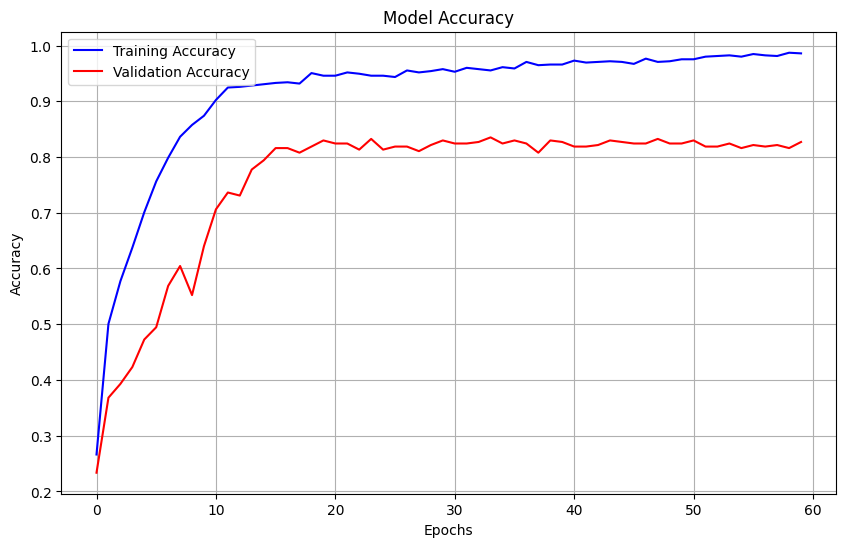

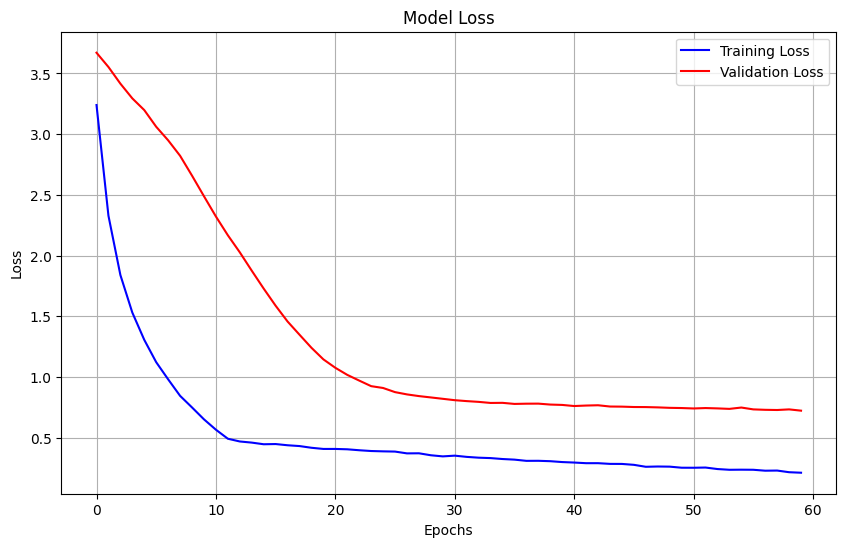

12/12 [==============================] - 0s 3ms/step


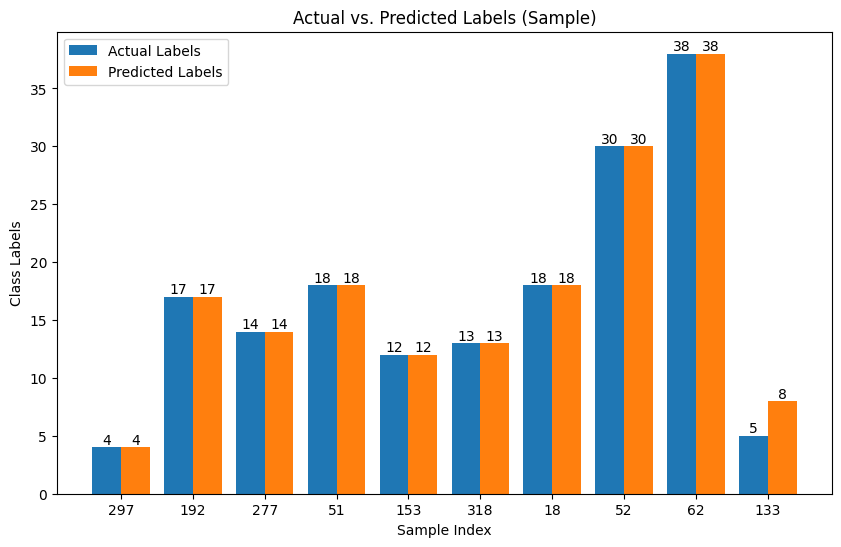

In [34]:
# Step 3 - Fit and Evaluate the model
# YOUR CODE HERE
# Fit the model
#model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

from keras.callbacks import LearningRateScheduler, EarlyStopping

# Define the learning rate scheduler
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.1
    return lr

def step_decay(epoch):
    initial_lr = 0.1
    drop = 0.5
    epochs_drop = 10
    lr = initial_lr * (drop ** np.floor((1 + epoch) / epochs_drop))
    return lr

# Create the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Create the LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

#lr_scheduler = LearningRateScheduler(step_decay)

# Train the model
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler], verbose=1)

#history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test),
#                    callbacks=[early_stopping, lr_scheduler], verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='r')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='b')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Get predicted probabilities for test data
pred_probs = model.predict(X_test)

# Convert predicted probabilities to class labels (binary labels)
pred_labels = np.argmax(pred_probs, axis=1)

# Select a random sample of data points for visualization
sample_size = 10
random_indices = np.random.choice(len(y_test), size=sample_size, replace=False)

# Create a bar chart comparing actual vs. predicted labels for the sample
plt.figure(figsize=(10, 6))
plt.bar(np.arange(sample_size) - 0.2, y_test[random_indices], width=0.4, label="Actual Labels")
plt.bar(np.arange(sample_size) + 0.2, pred_labels[random_indices], width=0.4, label="Predicted Labels")
# Annotate the bar chart with values
for i in range(sample_size):
    plt.text(i - 0.2, y_test[random_indices[i]], str(y_test[random_indices[i]]), ha='center', va='bottom')
    plt.text(i + 0.2, pred_labels[random_indices[i]], str(pred_labels[random_indices[i]]), ha='center', va='bottom')

plt.xlabel("Sample Index")
plt.ylabel("Class Labels")
plt.title("Actual vs. Predicted Labels (Sample)")
plt.xticks(np.arange(sample_size), random_indices)
plt.legend()
plt.show()

#### Try the different algorithms and compare the results with MLP classifier

###**Excercise 4**
### Train a CNN classifier on images (4 points)

* Split the data into train and test

* Train the CNN with 2D convolution and Maxpooling layers

* Get the accuracy score on train and test sets



* Define the keras model and initialize the layers
  - Ensure the input layer is specified with correct image size as input. This can be specified when creating the first layer with the input_shape argument.
* Speicify number of filters Kernel size, Pool size and activation function
  - filters,kernel_size and activation arguments of Conv2D layer can be used
  - pool_size argument of MaxPool2D can be used to set Pool size
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [35]:
# Step 1 - Build the architecture
# YOUR CODE HERE
import tensorflow as tf
from keras import datasets, layers, models

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_array_cnn, labels_array_cnn, test_size=0.3, random_state=42)

# Define the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(layers.MaxPooling2D((2, 2)))  # Max pooling with 2x2 pool size
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # 64 filters, 3x3 kernel
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(class_indices), activation='softmax'))

In [36]:
# Step 2 - Compile the model
# YOUR CODE HERE
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/12
27/27 [==============================] - 7s 52ms/step - loss: 10.7570 - accuracy: 0.0601 - val_loss: 3.5833 - val_accuracy: 0.0879
Epoch 2/12
27/27 [==============================] - 1s 36ms/step - loss: 3.3218 - accuracy: 0.1767 - val_loss: 3.0150 - val_accuracy: 0.2637
Epoch 3/12
27/27 [==============================] - 1s 35ms/step - loss: 2.7922 - accuracy: 0.3110 - val_loss: 2.6820 - val_accuracy: 0.3379
Epoch 4/12
27/27 [==============================] - 1s 36ms/step - loss: 2.3072 - accuracy: 0.4217 - val_loss: 2.3249 - val_accuracy: 0.4533
Epoch 5/12
27/27 [==============================] - 1s 37ms/step - loss: 1.8891 - accuracy: 0.5241 - val_loss: 2.0835 - val_accuracy: 0.4863
Epoch 6/12
27/27 [==============================] - 1s 37ms/step - loss: 1.5714 - accuracy: 0.5901 - val_loss: 1.8020 - val_accuracy: 0.5742
Epoch 7/12
27/27 [==============================] - 1s 37ms/step - loss: 1.2287 - accuracy: 0.6843 - val_loss: 1.6081 - val_accuracy: 0.6429
Epoch 8/12
2

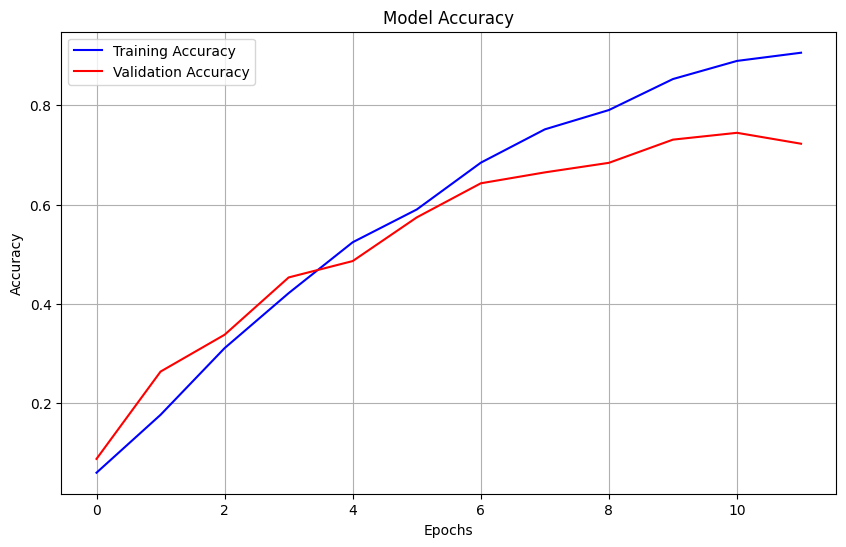

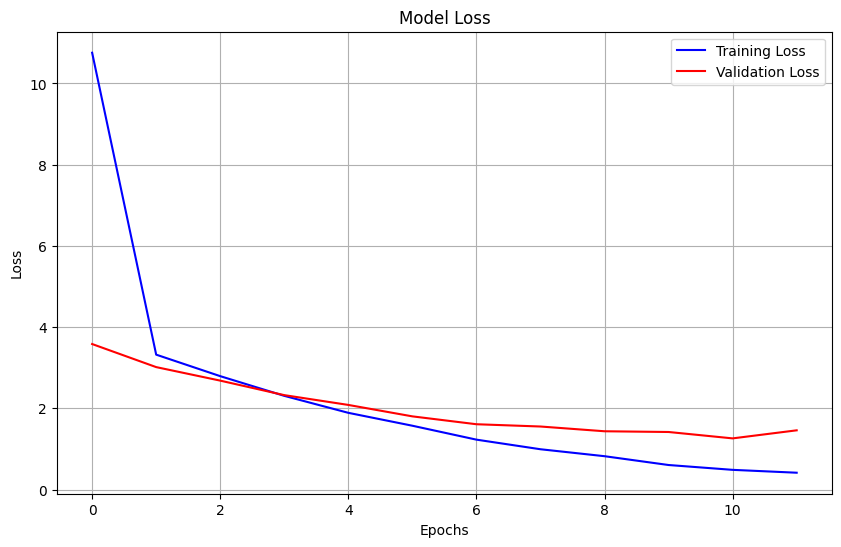

In [37]:
# Step 3 - Fit and Evaluate the model
# YOUR CODE HERE
# Train the model
history = model.fit(X_train, y_train, epochs=12, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='r')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='b')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### Experiment using Dropout, Regularization and Batch Normalization

Epoch 1/12
27/27 [==============================] - 7s 126ms/step - loss: 3.8905 - accuracy: 0.1095 - val_loss: 3.3248 - val_accuracy: 0.2308
Epoch 2/12
27/27 [==============================] - 2s 70ms/step - loss: 2.9952 - accuracy: 0.2768 - val_loss: 2.8173 - val_accuracy: 0.3544
Epoch 3/12
27/27 [==============================] - 1s 48ms/step - loss: 2.3764 - accuracy: 0.3722 - val_loss: 2.2131 - val_accuracy: 0.4863
Epoch 4/12
27/27 [==============================] - 1s 48ms/step - loss: 2.1183 - accuracy: 0.4170 - val_loss: 1.9246 - val_accuracy: 0.5302
Epoch 5/12
27/27 [==============================] - 1s 48ms/step - loss: 1.7854 - accuracy: 0.4959 - val_loss: 1.6874 - val_accuracy: 0.5604
Epoch 6/12
27/27 [==============================] - 1s 49ms/step - loss: 1.6801 - accuracy: 0.5300 - val_loss: 1.3996 - val_accuracy: 0.6236
Epoch 7/12
27/27 [==============================] - 1s 48ms/step - loss: 1.3934 - accuracy: 0.6160 - val_loss: 1.2132 - val_accuracy: 0.6896
Epoch 8/12
2

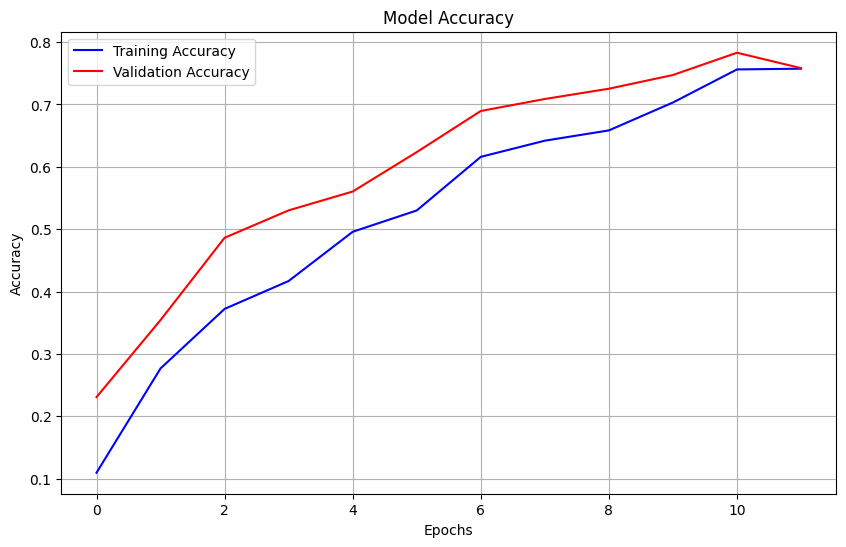

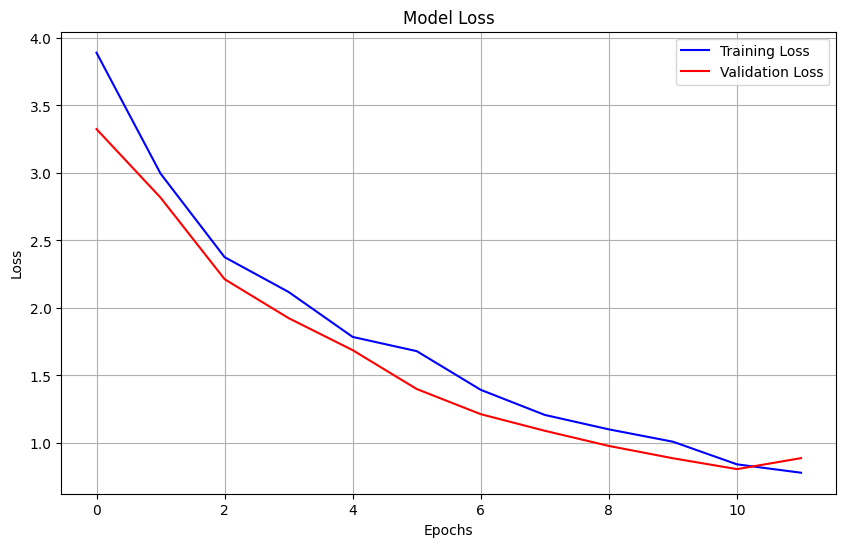

In [38]:
# YOUR CODE HERE

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(features_array_cnn, labels_array_cnn, test_size=0.2, random_state=42)

# Define the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30,30,3)))
model.add(layers.BatchNormalization())  # Add Batch Normalization
model.add(layers.MaxPooling2D((2, 2)))  # Max pooling with 2x2 pool size
model.add(layers.Dropout(0.25))  # Add Dropout

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # 64 filters, 3x3 kernel
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

# Add fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))  # Add Dropout
model.add(layers.Dense(len(class_indices), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=12, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='r')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='b')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()